In [10]:

import OptEnv as opt_env
import errorOptEnv as errorEnv
import plot_save_output as plot_self
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec
import pickle
import sys
import warnings
warnings.filterwarnings("error", category=RuntimeWarning)
import logging
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
%autoreload
q0=20
q1=-50
q2=50
q3=-40
q4=30
q5=-50
q6=30
q7=-40




# # enter the values here over which to optimise, otherwise hard-code them into MAD-X file
x = {
    0: {'name': 'quad0', 'strength': q0, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},
    1: {'name': 'quad1', 'strength': q1, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},
    2: {'name': 'quad2', 'strength': q2, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},
    3: {'name': 'quad3', 'strength': q3, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},
    4: {'name': 'quad4', 'strength': q4, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},
    5: {'name': 'quad5', 'strength': q5, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},
    6: {'name': 'quad6', 'strength': q6, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},
    7: {'name': 'quad7', 'strength': q7, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},

}

# Specify parameters for optimisation
# filename = 'general_tt43_python_foil.madx'
filename = 'general_tt43_EARLI.madx'
# solver = 'Powell'
solver = 'Nelder-Mead'
n_iter = 2000
n_particles = 1000  # Used to generate distribution to track
foil_w = 0.001e-6
init_dist = []
thin = False
# file = 'distr/Ellipse_150MeV_nominal.tfs'
test = True # If test=True the nominal optics is run
run_error = False




if test:
    x = {
        0: {'name': 'quad0', 'strength': q0, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},
        1: {'name': 'quad1', 'strength': q1, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},
        2: {'name': 'quad2', 'strength': q2, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},
        3: {'name': 'quad3', 'strength': q3, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},
        4: {'name': 'quad4', 'strength': q4, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},
        5: {'name': 'quad5', 'strength': q5, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},
        6: {'name': 'quad6', 'strength': q6, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},
        7: {'name': 'quad7', 'strength': q7, 'type': 'quadrupole', 'norm': 7, 'limits':(-1,1)},

    }




# Initialise environment

# Initialise input distribution
env = opt_env.kOptEnv(solver, n_particles, n_iter, init_dist, foil_w, x, thin=thin, file=filename)
# Initialise input distribution
init_dist = np.zeros((n_particles, 6))
covx = np.array([[5e-6**2,0], [0, 1e-3**2]])
xxp = np.random.multivariate_normal(np.array([0,0]), covx, size=n_particles)
covy = np.array([[5e-6**2,0], [0, (2e-3)**2]])
yyp = np.random.multivariate_normal(np.array([0,0]), covy, size=n_particles)
covz = np.array([[2e-6**2,0], [0, 2e-4**2]])
zzp = np.random.multivariate_normal(np.array([0,0]), covz, size=n_particles)
init_dist[:,0] = xxp[:,0]
init_dist[:,3] = xxp[:,1]
init_dist[:,1] = yyp[:,0]
init_dist[:,4] = yyp[:,1]
init_dist[:,2] = zzp[:,0]
init_dist[:,5] = zzp[:,1]
env.init_dist = init_dist

In [73]:
if test:
    # env = opt_env.kOptEnv(solver, n_particles, n_iter, init_dist, foil_w, x, thin=thin, file=filename)


    # if test == 'On'
    
    env.step(env.norm_data([y['strength'] for y in x.values()]))
    out_plot = plot_self.Plot(env.madx, env.x_best, x, init_dist, foil_w, env.output_all, env.x_all)

[20, -50, 50, -40, 30, -50, 30, -40]
iter = 1
input emittance x = 1.3938, 2.9179 um
beta - x,y = 0.0052, 0.0025; alpha - x,y = 0.0488, -0.0290: 
q0=20.0
q1=-50.0
q2=50.0
q3=-40.0
q4=30.0
q5=-50.0
q6=30.0
q7=-40.0
35
35
loss is at 96.5%
beta - x,y = 0.0053, 0.0030; alpha - x,y = 10.0000, 10.0000; dx - inj, end = 0.0000, 0.0000): 
SIG_x =100000000.0, SIG_y=100000000.0, SIG_z=1000.0
NOM SIG_x =4.812, SIG_y=6.9624
LOSS = 965
[9.66000000e+12 9.66000000e+12 2.00000000e+09 0.00000000e+00 2.28942332e-03 0.00000000e+00 0.00000000e+00 1.00000000e+02 1.00000000e+02 9.65000000e+03]
ymse = 1.86631204e+25
best = 1.86631204e+25


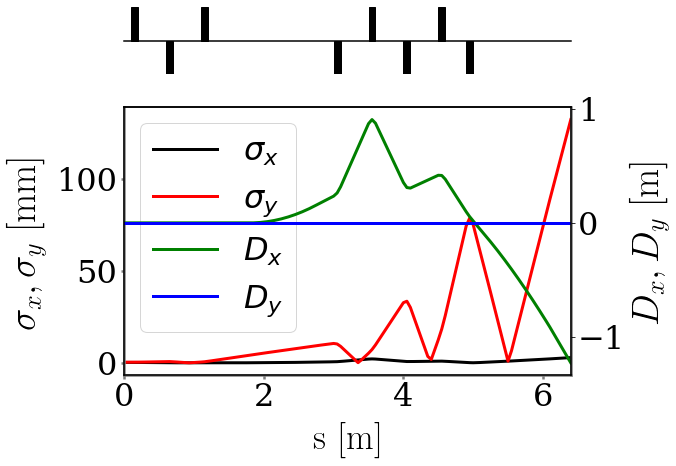

In [74]:
out_plot.twiss()

In [70]:
gamma = np.sqrt(0.511e-3 ** 2 + 200e-3 ** 2) / 0.511e-3

epsx = 2e-6*gamma

madx = Madx()
madx.call(filename)
madx.select(FLAG='makethin', THICK=True)
madx.makethin(SEQUENCE='TT43', STYLE='teapot')
madx.use(sequence='TT43')
twiss_out = madx.twiss(ALFX=0, ALFY=0, BETX = 5e-3, BETY = 2.5e-3, DX = 0, DY=0)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.00  (64 bit, Windows)     +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.01.13               +
  + Execution date: 2022.12.12 17:36:42      +
  ++++++++++++++++++++++++++++++++++++++++++++

option, RBARC=FALSE;

BEAM, particle=electron, PC=200e-3, exn=2e-6, eyn=4e-6, npart=1.25e9, bunched, sigt=61.6e-6;



!-------------------------------------------------------

!   Elements

!-------------------------------------------------------



//-------------- Bending Magnets

MBH: RBEND, L := 0.9 , apertype = ellipse , FINT := fint_h_var, hgap = 0.02, aperture = {0.04,0.04};  		! Bending magnet, horizontal

fint_h_var = 0.0;



//-------------- Quadrupoles

QUAD: QUADRUPOLE, L := 0.1,aperture = {0.025,0.025};

!SEXT: SEXTUPOLE, L := 0.2, aperture = {0.25,0.25};

!OCT: OCTUPOLE, L := 0.2, aperture = {0.25,0.25};



//-------------- Correctors

!COR: KICKER, L := 0.,   apertype = ellipse, aperture = {0

In [71]:
twiss_out['keyword']

array(['marker', 'drift', 'marker', 'quadrupole', 'marker', 'drift', 'marker', 'quadrupole', 'marker', 'drift', 'marker', 'quadrupole', 'marker', 'drift', 'marker', 'dipedge', 'sbend', 'dipedge', 'marker', 'drift', 'marker', 'quadrupole', 'marker', 'drift', 'marker', 'quadrupole', 'marker', 'drift', 'marker', 'quadrupole', 'marker', 'drift', 'marker', 'quadrupole', 'marker', 'drift', 'marker', 'quadrupole', 'marker', 'drift', 'marker', 'dipedge', 'sbend', 'dipedge', 'marker', 'drift', 'marker', 'drift', 'marker', 'drift', 'marker', 'drift', 'marker'], dtype='<U10')

In [58]:
epsx = 2e-6*gamma

5e-6**2/epsx

3.193739575611116e-08

In [33]:
np.sqrt(epsx*3e-3)

0.0015324308336428854

In [36]:
0.001**2

1e-06

In [37]:
epsx/1e-6

782.7814199664762